In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [5]:
finetach_appdata = pd.read_csv("C:\\Users\\Anisha Majhi\\csv file\\FineTech_appData.csv")

In [6]:
finetach_appdata.shape

(50000, 12)

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [8]:
finetach_appdata.head(8)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0


In [9]:
finetach_appdata['enrolled_date'].head()

0                        NaN
1                        NaN
2                        NaN
3    2013-07-05 16:11:49.513
4    2013-02-26 18:56:37.841
Name: enrolled_date, dtype: object

In [10]:
for i in [1,2,3,4,5]:
    print(finetach_appdata.loc[i,'screen_list'],'\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



In [11]:
finetach_appdata.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [12]:
finetach_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [13]:
features = finetach_appdata.columns
features

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [14]:
for i in features:
    print("unique value of ",i,' is ', finetach_appdata[i].value_counts().keys(),'\n','length is ',len(finetach_appdata[i].value_counts().keys()),'\n','........................','\n\n')

unique value of  user  is  Int64Index([153305, 334002,  86519, 112047, 256688,  14494,  72102, 110514,
            171623, 210209,
            ...
            292607, 170824,  38445, 315049, 350273,  85244, 141466,  18722,
            330294,  27047],
           dtype='int64', length=49874) 
 length is  49874 
 ........................ 


unique value of  first_open  is  Index(['2012-11-25 15:00:00.365', '2012-11-26 15:00:00.360',
       '2012-11-24 15:00:00.365', '2012-11-24 15:00:00.362',
       '2012-11-24 15:00:00.366', '2012-11-26 15:00:00.363',
       '2012-11-30 15:00:00.371', '2012-11-30 15:00:00.370',
       '2012-11-26 15:00:00.366', '2012-11-26 15:00:00.362',
       ...
       '2013-04-09 18:25:55.710', '2013-07-04 20:12:07.054',
       '2013-02-01 23:36:26.551', '2013-04-03 17:13:34.319',
       '2013-06-26 07:54:28.650', '2013-01-15 07:13:04.537',
       '2013-01-31 14:35:48.485', '2013-07-01 06:40:12.279',
       '2013-06-30 00:43:55.770', '2012-12-14 01:22:44.638'],
    

In [15]:
finetach_appdata.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [16]:
finetach_appdata['hour'] = finetach_appdata.hour.str.slice(1,3).astype(int) 

In [17]:
finetach_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  int32 
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int32(1), int64(8), object(3)
memory usage: 4.4+ MB


In [18]:
finetach_appdata2 = finetach_appdata.drop(['user','first_open','screen_list','enrolled_date'],axis=1)

In [19]:
finetach_appdata2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


# Data Visualization

## heatmap 

<Axes: >

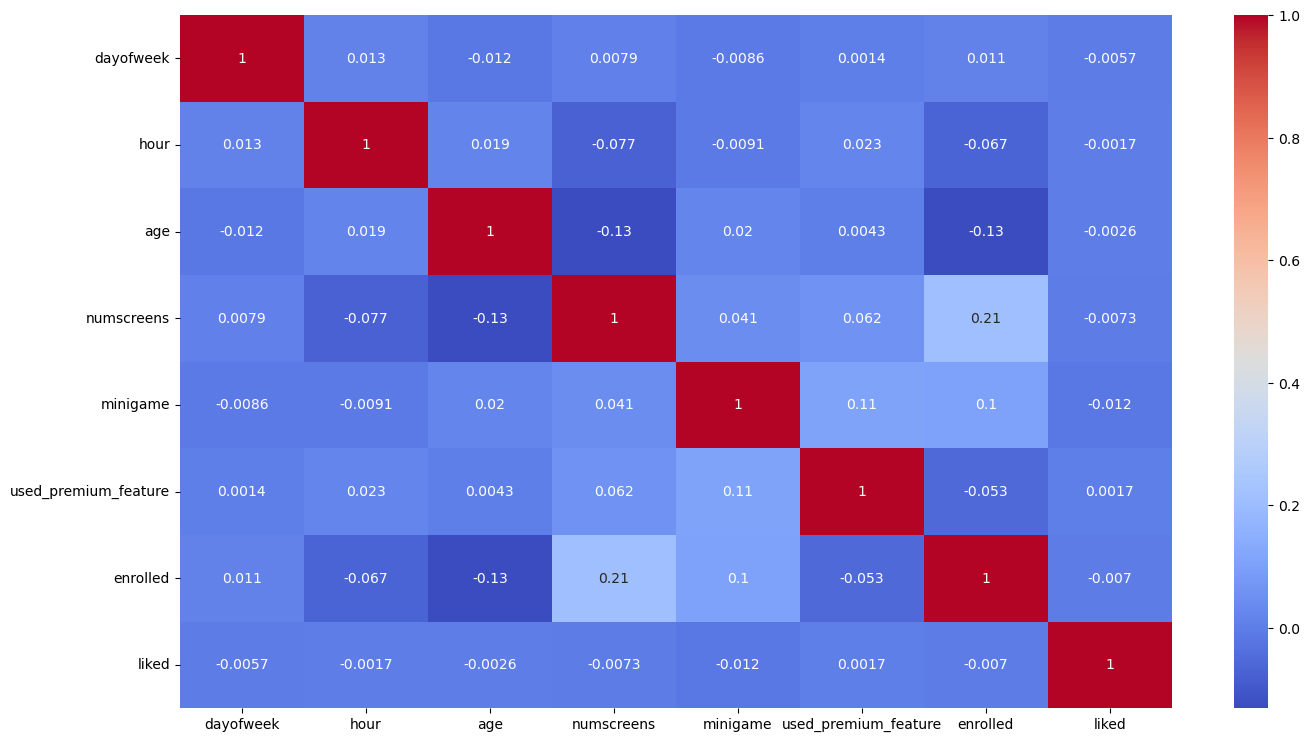

In [17]:
plt.figure(figsize=(16,9))
sns.heatmap(finetach_appdata2.corr(),annot=True,cmap='coolwarm')

## pairplot of finetach_appdata2

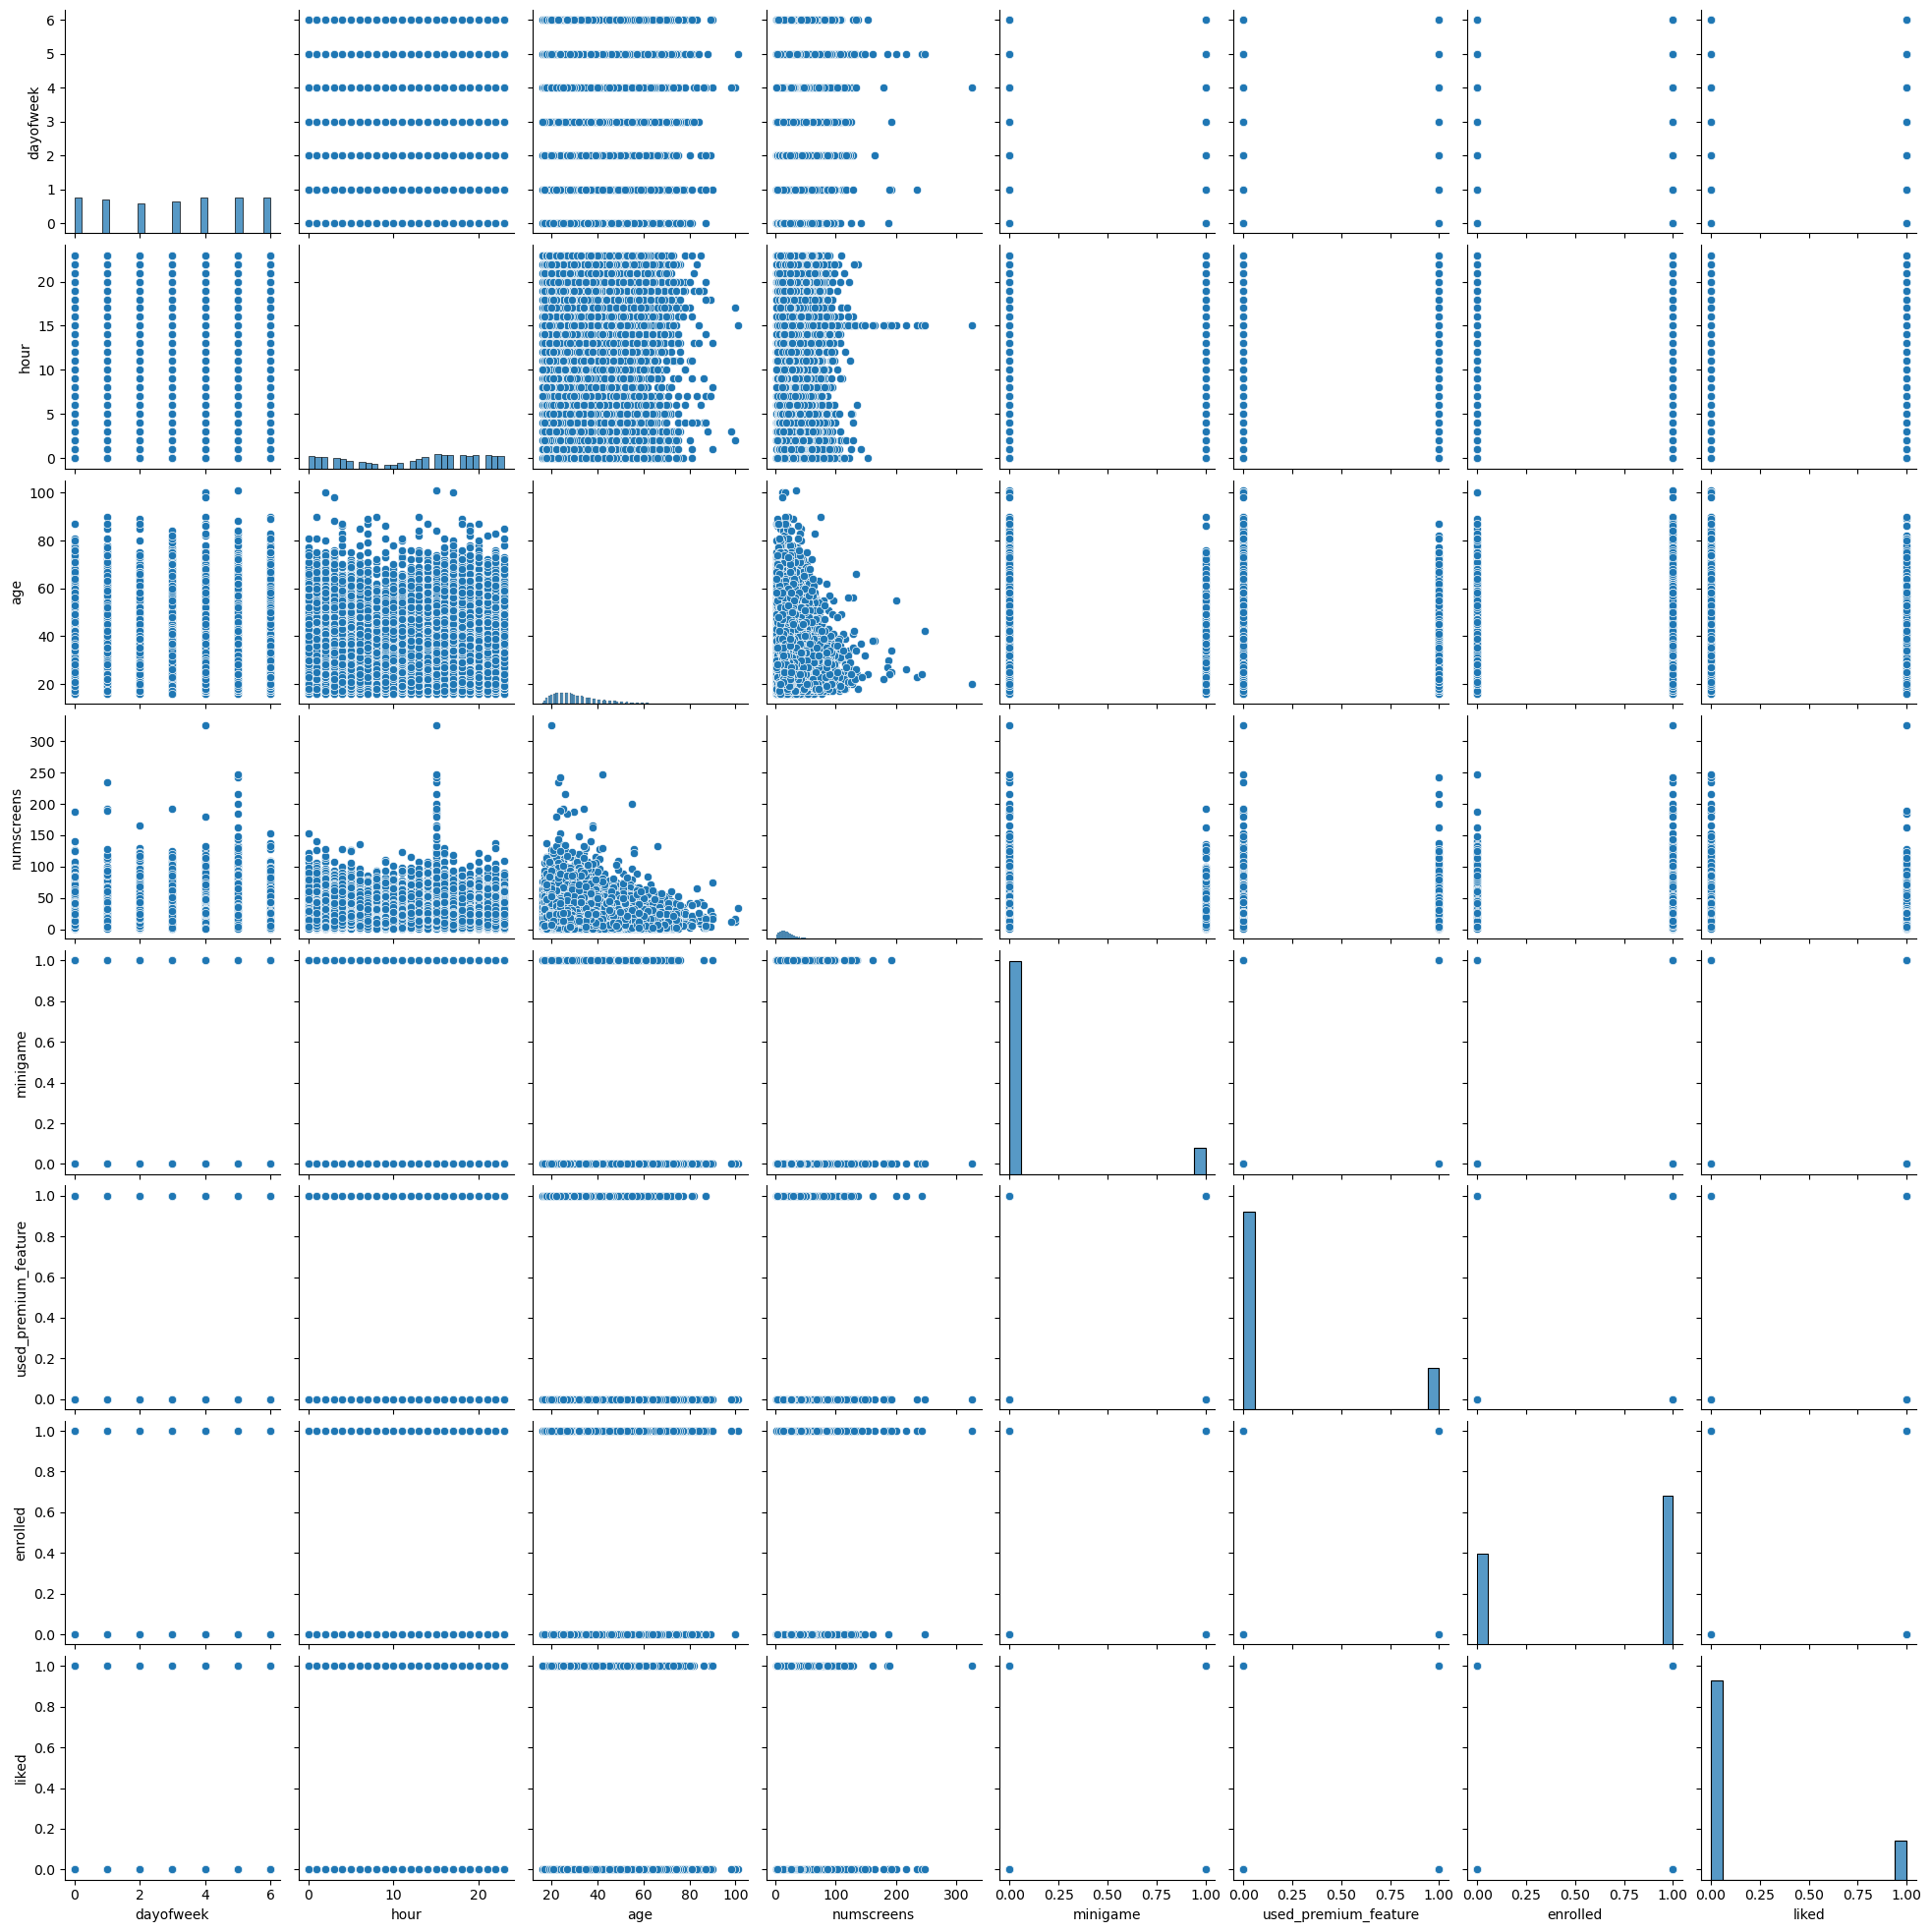

In [18]:
sns.pairplot(finetach_appdata2)

## hisrogram of each feature of finetech_appdata

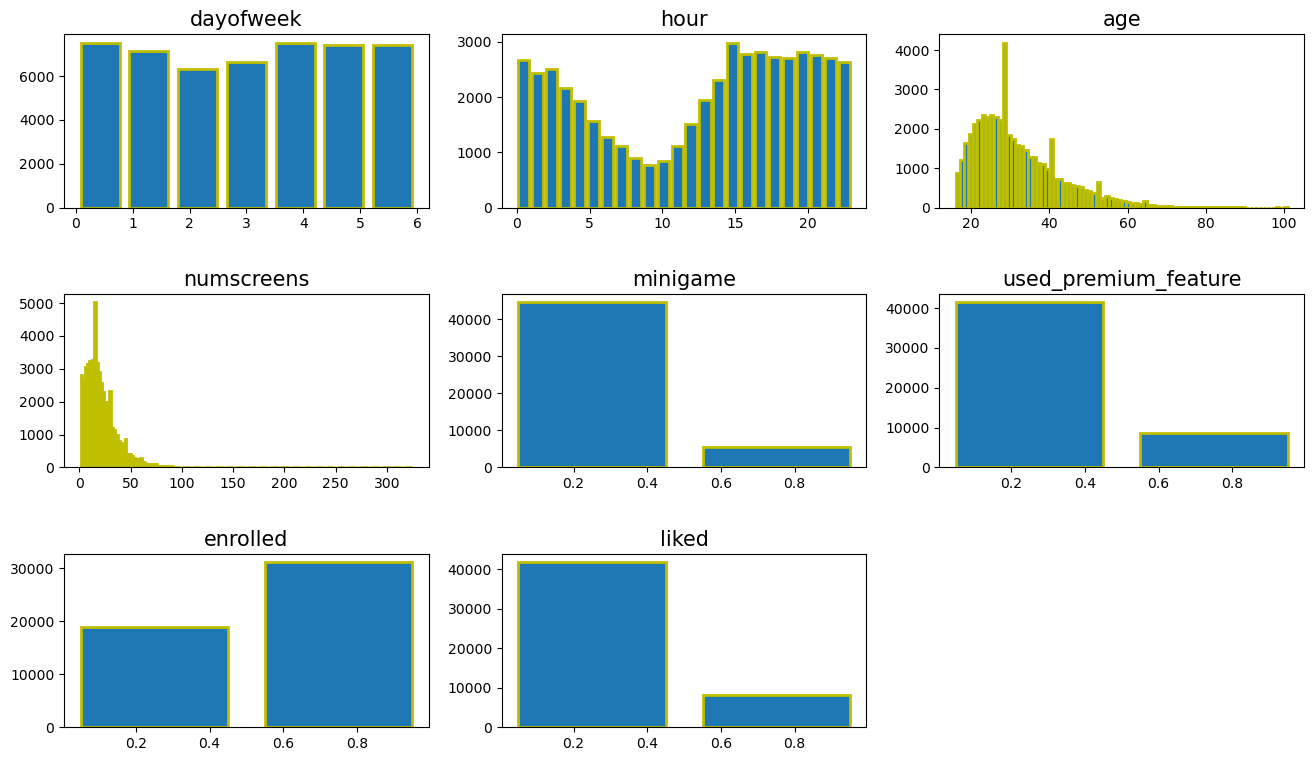

In [19]:
plt.figure(figsize = (16,9)) # figure size in ratio 16:9
features = finetach_appdata2.columns # list of columns name
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1) # create subplot for histogram
    plt.title(j, fontsize = 15) # title of histogram
     
    bins = len(finetach_appdata2[j].unique()) # bins for histogram
    plt.hist(finetach_appdata2[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, ) # plot histogram
     
plt.subplots_adjust(hspace=0.5) # space between horixontal axes (subplots)

In [20]:
finetach_appdata['first_open'] = [parser.parse(i) for i in finetach_appdata['first_open']]

In [21]:
finetach_appdata['first_open'].head()

0   2012-12-27 02:14:51.273
1   2012-12-02 01:16:00.905
2   2013-03-19 19:19:09.157
3   2013-07-05 16:08:46.354
4   2013-02-26 18:50:48.661
Name: first_open, dtype: datetime64[ns]

In [22]:
finetach_appdata['enrolled_date'] = [parser.parse(i) if isinstance(i,str) else i for i in finetach_appdata['enrolled_date']]

In [23]:
finetach_appdata['enrolled_date'].head()

0                       NaT
1                       NaT
2                       NaT
3   2013-07-05 16:11:49.513
4   2013-02-26 18:56:37.841
Name: enrolled_date, dtype: datetime64[ns]

In [24]:
finetach_appdata.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [25]:
finetach_appdata['time_to_enrolled'] = (finetach_appdata['enrolled_date']-finetach_appdata['first_open']).astype('timedelta64[h]')


In [26]:
finetach_appdata['time_to_enrolled'].head()

0    NaN
1    NaN
2    NaN
3    0.0
4    0.0
Name: time_to_enrolled, dtype: float64

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <BarContainer object of 10 artists>)

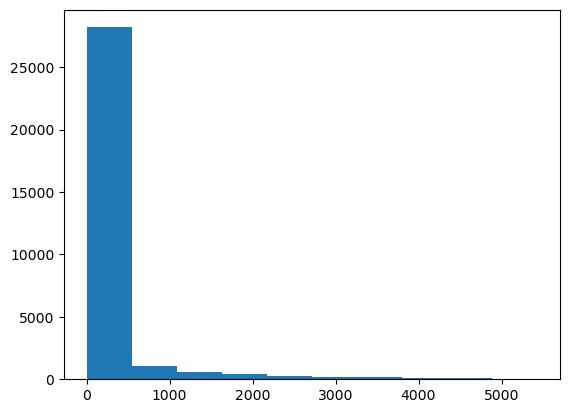

In [27]:
plt.hist(finetach_appdata['time_to_enrolled'].dropna())

In [28]:
finetach_appdata.loc[finetach_appdata.time_to_enrolled>48,'enrolled'] = 0

In [29]:
finetach_appdata.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enrolled
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


In [30]:
finetach_appdata.drop(columns=['first_open','enrolled_date','time_to_enrolled'],inplace=True)

In [31]:
finetach_appdata.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [32]:
finetach_appdata_screen_data = pd.read_csv("C:\\Users\\Anisha Majhi\\csv file\\top_screens.csv").top_screens.values

In [33]:
finetach_appdata_screen_data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [34]:
type(finetach_appdata_screen_data)

numpy.ndarray

In [35]:
finetach_appdata['screen_list'] = finetach_appdata.screen_list.astype(str) + ','


In [36]:
for screen_name in finetach_appdata_screen_data:
    finetach_appdata[screen_name] = finetach_appdata.screen_list.str.contains(screen_name).astype(int)
    finetach_appdata['screen_list'] = finetach_appdata.screen_list.str.replace(screen_name+',','')

In [37]:
finetach_appdata.shape

(50000, 68)

In [38]:
finetach_appdata.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
finetach_appdata.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [40]:
finetach_appdata.screen_list.str.count(',').head(6)

0     7
1     5
2     0
3     6
4    10
5     6
Name: screen_list, dtype: int64

In [41]:
finetach_appdata['remain_screen_list'] = finetach_appdata.screen_list.str.count(',')

In [42]:
finetach_appdata.drop(columns=['screen_list'],inplace=True)

In [43]:
finetach_appdata.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list
0,235136,3,2,23,15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10


In [44]:
finetach_appdata.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [45]:
saving_screen = ['Saving1','Saving2','Saving4', 'Saving6','Saving7','Saving5','Saving8','Saving9','Saving10','Saving2Amount']
finetach_appdata['saving_screens_count'] = finetach_appdata[saving_screen].sum(axis = 1)
finetach_appdata.drop(columns = saving_screen, inplace = True)

In [46]:
finetach_appdata.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count
0,235136,3,2,23,15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0


In [47]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
finetach_appdata['credit_screens_count'] = finetach_appdata[credit_screens].sum(axis = 1)
finetach_appdata.drop(columns = credit_screens, axis = 1, inplace = True)

In [48]:
finetach_appdata.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,EditProfile,Finances,CC3,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count
0,235136,3,2,23,15,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,0,0
1,333588,6,1,24,13,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3
4,51549,1,18,31,32,0,0,1,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2


In [49]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
finetach_appdata['cc_screens_count'] = finetach_appdata[cc_screens].sum(axis = 1)
finetach_appdata.drop(columns = cc_screens, inplace = True)

In [50]:
finetach_appdata.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Loan3,Splash,Loan,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count
0,235136,3,2,23,15,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,0,0,0
1,333588,6,1,24,13,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0
4,51549,1,18,31,32,0,0,1,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0


In [51]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
finetach_appdata['loan_screens_count'] = finetach_appdata[loan_screens].sum(axis = 1)
finetach_appdata.drop(columns = loan_screens, inplace = True)

In [52]:
finetach_appdata.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
0,235136,3,2,23,15,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1


In [53]:
finetach_appdata.shape

(50000, 50)

In [54]:
finetach_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

<Axes: >

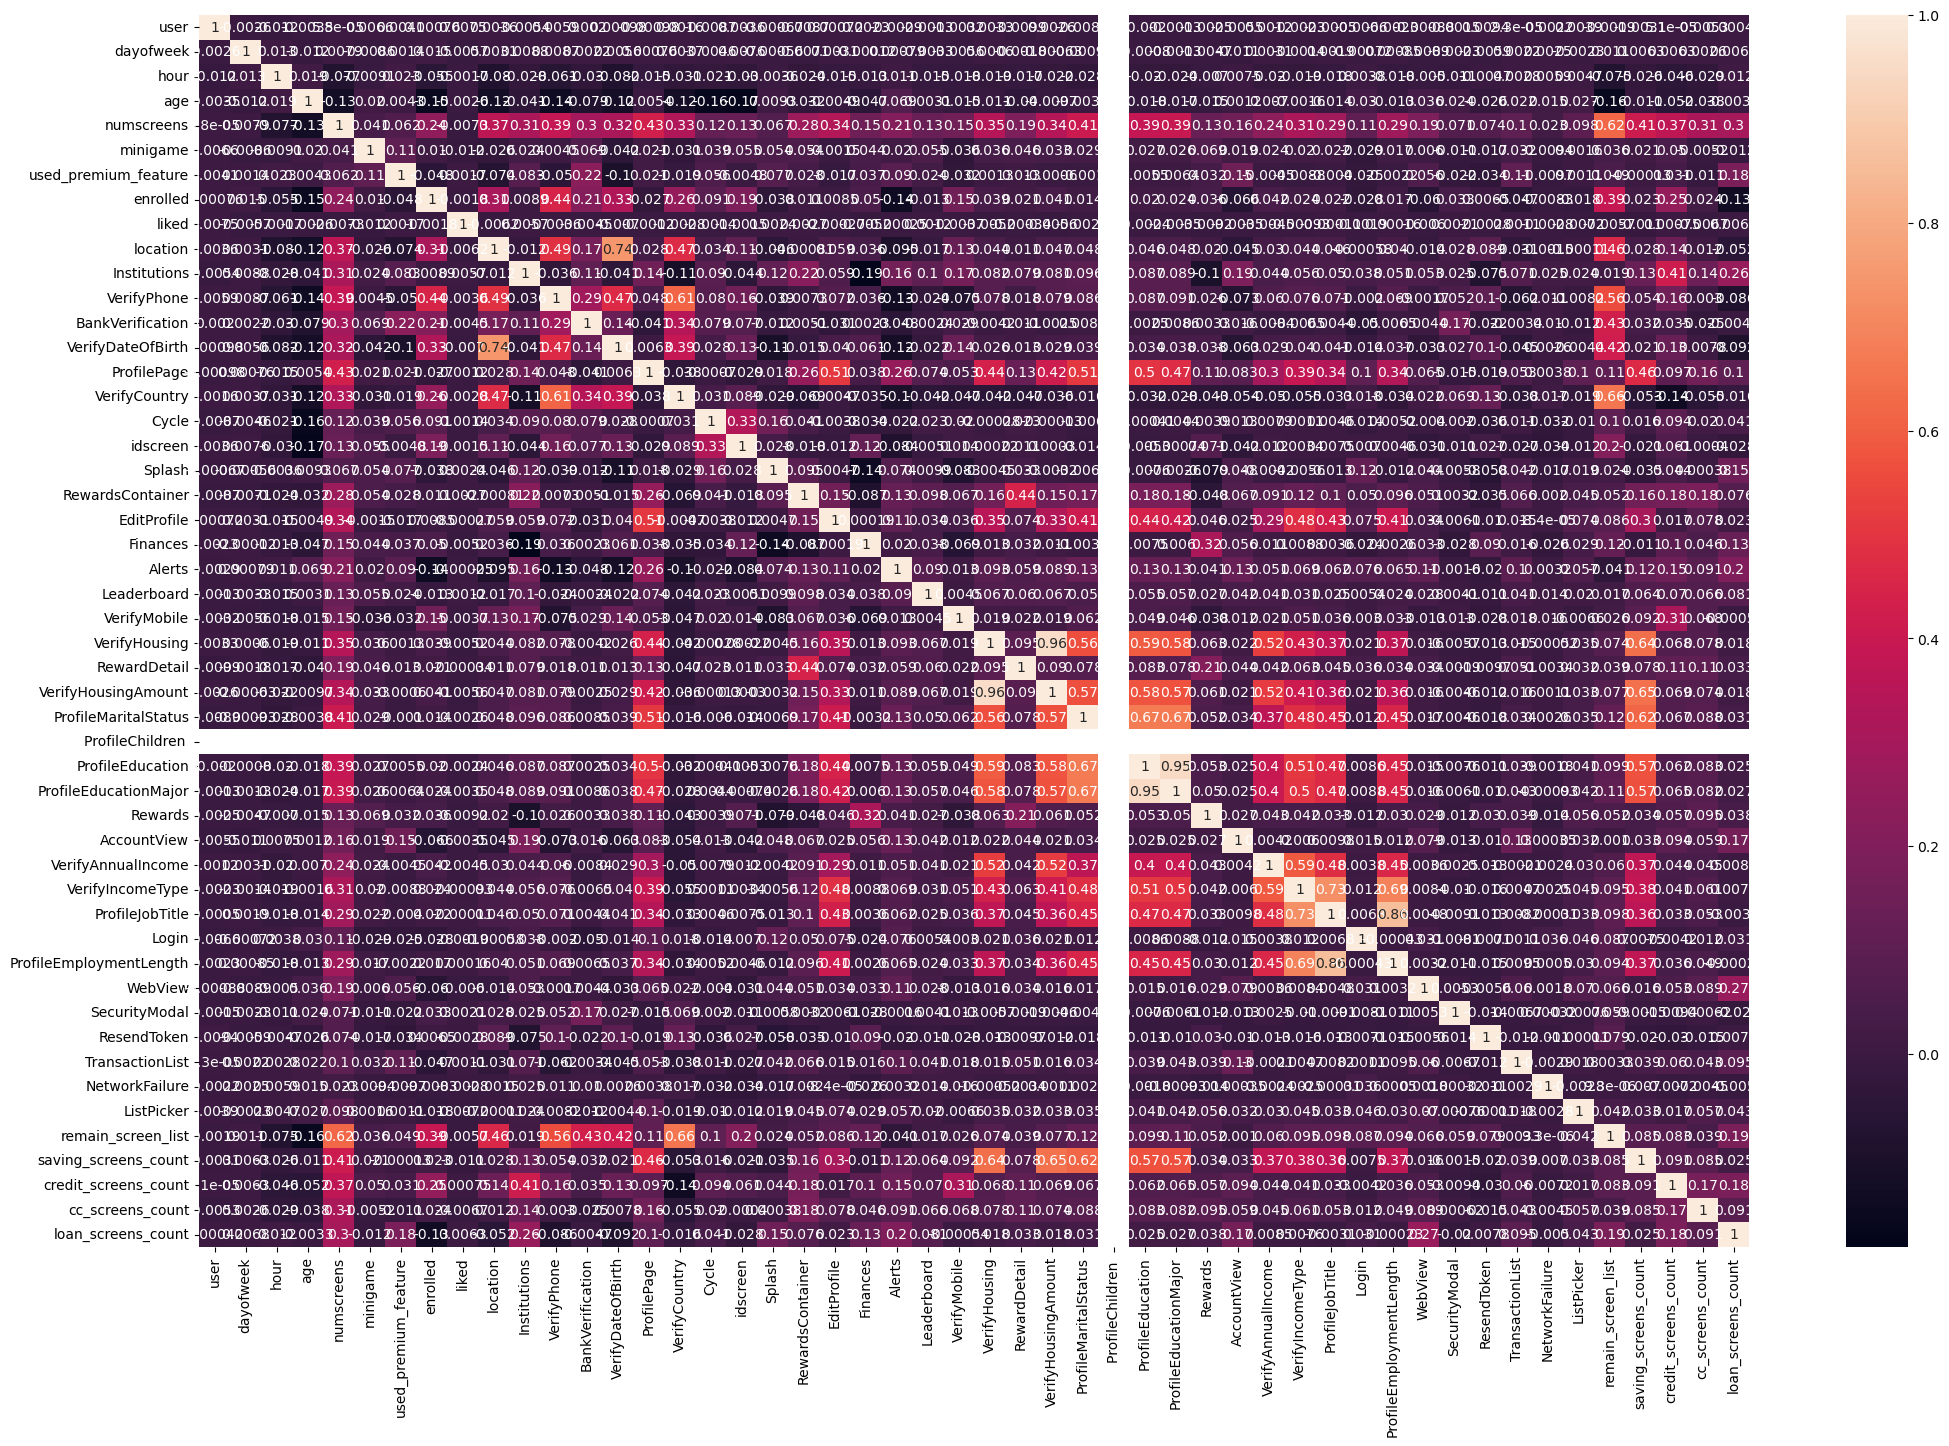

In [55]:
plt.figure(figsize=(25,16))
sns.heatmap(finetach_appdata.corr(),annot=True)

In [56]:
finetach_appdata['ProfileChildren']

KeyError: 'ProfileChildren'

In [ ]:
corr_matrix = finetach_appdata.corr()
corr_matrix['ProfileChildren']

# Data processing

In [57]:
clean_finetech_appdata = finetach_appdata
target = finetach_appdata['enrolled']
finetach_appdata.drop(columns = ['enrolled'],inplace=True)

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(finetach_appdata,target,test_size=0.2,random_state=0)

In [59]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)


x_train shape (40000, 49)
x_test shape (10000, 49)
y_train shape (40000,)
y_test shape (10000,)


In [60]:
train_userid = x_train['user']
x_train.drop(columns='user',inplace=True)
test_userid = x_test['user']
x_test.drop(columns='user',inplace=True)

In [61]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)


x_train shape (40000, 48)
x_test shape (10000, 48)
y_train shape (40000,)
y_test shape (10000,)


# Feature scalling

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(x_train)
X_test_sc = sc.fit_transform(x_test)

# Machine Learning Model Building

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Decision Tree Classifier

In [65]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
accuracy_score(y_test, y_pred_dt)*100

69.36

In [66]:
# train with Standert Scaling dataset
dt_model2 = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_model2.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)*100

69.35

## Random Forest Classifier

In [69]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
 
accuracy_score(y_test, y_pred_rf)

0.7621

In [70]:
# train with Standert Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_rf_sc)

0.7625